In [1]:
#Python Warning off
import warnings
warnings.filterwarnings('ignore')

# #TF warning off
# import tensorflow as tf
# tf.compat.v2.logging.set_verbosity(tf.compat.v2.logging.ERROR)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras

In [5]:
#EDA

In [6]:
df = pd.read_csv("datasets/hotel_bookings.csv")
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
5       Resort Hotel            0         14               2015   
6       Resort Hotel            0          0               2015   
7       Resort Hotel            0          9               2015   
8       Resort Hotel            1         85               2015   
9       Resort Hotel            1         75               2015   
10      Resort Hotel            1         23               2015   
11      Resort Hotel            0         35               2015   
12      Resort Hotel            0         68               2015   
13      Resort Hotel            0         18               2015   
14      Resort Hotel            0         37               2015   
15      Resort Hotel            0         68               2015   
16      Resort Hotel            0         37               2015   
17      Resort Hotel            0         12               2015   
18      Resort Hotel            0          0               2015   
19      Resort Hotel            0          7               2015   
20      Resort Hotel            0         37               2015   
21      Resort Hotel            0         72               2015   
22      Resort Hotel            0         72               2015   
23      Resort Hotel            0         72               2015   
24      Resort Hotel            0        127               2015   
25      Resort Hotel            0         78               2015   
26      Resort Hotel            0         48               2015   
27      Resort Hotel            1         60               2015   
28      Resort Hotel            0         77               2015   
29      Resort Hotel            0         99               2015   
...              ...          ...        ...                ...   
119360    City Hotel            0        195               2017   
119361    City Hotel            0        100               2017   
119362    City Hotel            0        198               2017   
119363    City Hotel            0        212               2017   
119364    City Hotel            0        212               2017   
119365    City Hotel            0         54               2017   
119366    City Hotel            0        210               2017   
119367    City Hotel            0        212               2017   
119368    City Hotel            0        261               2017   
119369    City Hotel            0        207               2017   
119370    City Hotel            0        201               2017   
119371    City Hotel            0        175               2017   
119372    City Hotel            0        175               2017   
119373    City Hotel            0        175               2017   
119374    City Hotel            0        201               2017   
119375    City Hotel            0        200               2017   
119376    City Hotel            0        165               2017   
119377    City Hotel            0        185               2017   
119378    City Hotel            0        247               2017   
119379    City Hotel            0        109               2017   
119380    City Hotel            0         44               2017   
119381    City Hotel            0        188               2017   
119382    City Hotel            0        135               2017   
119383    City Hotel            0        164               2017   
119384    City Hotel            0         21               2017   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               201

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [8]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

C:\Users\User\anaconda3\envs\tf2\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


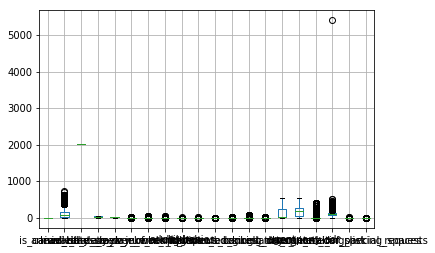

In [9]:
df.boxplot()

In [10]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

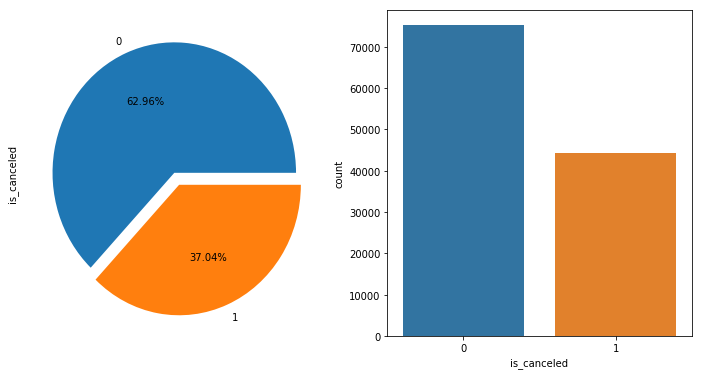

In [11]:
# 1. is_canceled 분포 37% 취소
f, ax = plt.subplots(1,2,figsize=(12,6))
# """f는 피규어 정보를 담고 있는데, 여기서는 안썼음. 그래서 _,ax 로 두어도 됨. 참고로 ax 는 아래 두 칸을 의미함. 그래서 ax[0], ax[1]로 쓸 수 있음"""

df['is_canceled'].value_counts().plot.pie(explode=[0,0.1],autopct="%.2f%%",ax=ax[0])
# """ 위에서 밸류 카운트 한걸 파이 차트로 그린다는 의미 """

sns.countplot('is_canceled',data=df, ax=ax[1])
# """ 위에서 밸류 카운트 한 걸 카운트플롯 한다는 의미 """

'bins는 단위'

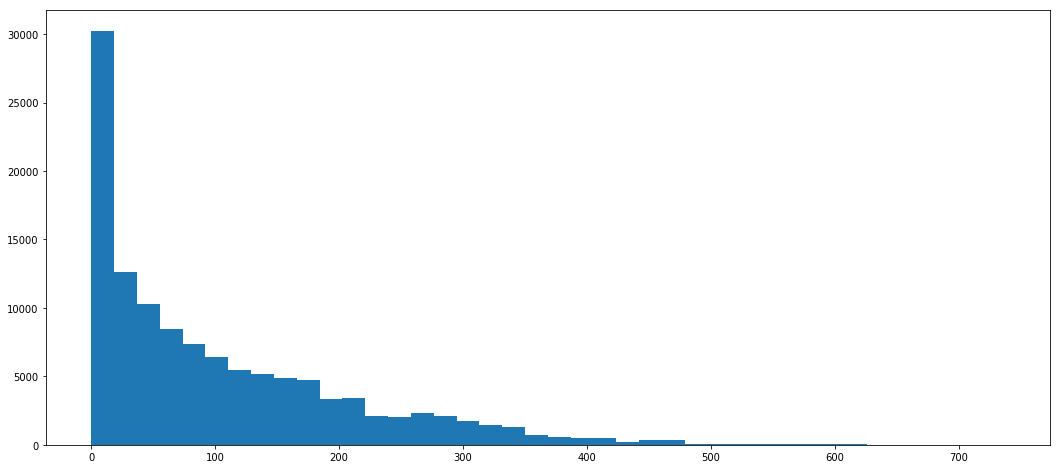

In [64]:
#2. lead_time 분포 (몇박몇일) : PMS에 예약을 입력한 날짜와 도착 날짜 사이에 경과한 일 수
df['lead_time'].hist(bins=40,figsize=(18,8),grid=False)
"""bins는 단위"""

# # d = np.array(df['lead_time'])
# # d = d.normal(size=100)

# f, axes = plt.subplots( figsize=(7, 7), sharex=True)
# sns.despine(left=True)
# sns.distplot(df['lead_time'], color="m", ax=ax[0])

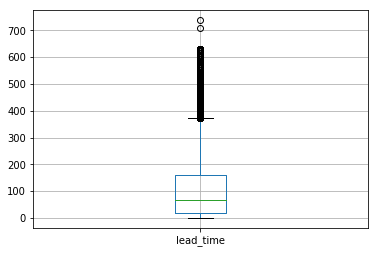

In [45]:
df['adr'].max()
# df['adr'][]
df[df['adr'] == 5400]
# df = df.drop([0,1,2], axis=0)
# df = df.drop([48515], axis=0)
df['adr'].max()
df.boxplot(column= ['lead_time'])

In [14]:
from sklearn.preprocessing import MinMaxScaler # 0.0 ~1.0 사이로 스케일링
from sklearn.preprocessing import LabelEncoder # 글자를 숫자로 (one hot encoding 전단계)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [16]:
# Y_encoded = LabelEncoder().fit_transform(df['hotel', 'arrival_date_month', 'meal','country','market_segment','distribution_channel','reserved_room_type',
#                                             'assigned_room_type','deposit_type','customer_type','reservation_status','reservation_status_date'])
# Y_encoded


In [17]:
# 순위      항목       			weight		std
# 0	lead_time			0.145140		0.015235
# 1	deposit_type_Non Refund	0.140641		0.108007
# 2	adr			0.096222		0.003412
# 3	deposit_type_No Deposit	0.079059		0.106235
# 4	arrival_date_day_of_month	0.069410		0.002033
# 5	arrival_date_week_number	0.053763		0.001999
# 6	total_of_special_requests	0.050567		0.013314
# 7	agent			0.043060		0.006392
# 8	stays_in_week_nights	0.041588		0.002291
# 9	previous_cancellations	0.038626		0.013459

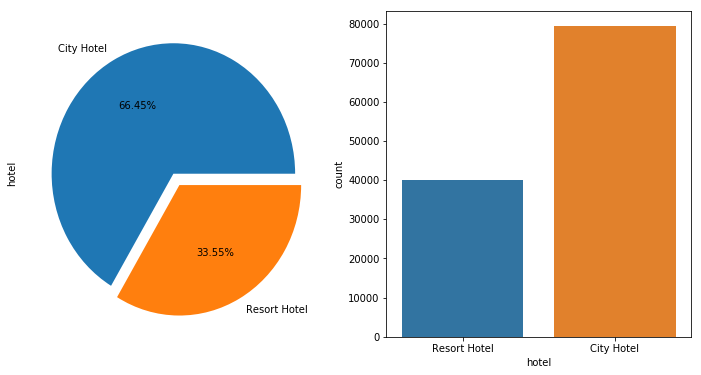

In [18]:
#전체에서 Resort 와 city hotel 의 비율 
# 1. is_canceled 분포 37% 취소
f, ax = plt.subplots(1,2,figsize=(12,6))
# """f는 피규어 정보를 담고 있는데, 여기서는 안썼음. 그래서 _,ax 로 두어도 됨. 참고로 ax 는 아래 두 칸을 의미함. 그래서 ax[0], ax[1]로 쓸 수 있음"""

df['hotel'].value_counts().plot.pie(explode=[0,0.1],autopct="%.2f%%",ax=ax[0])
# """ 위에서 밸류 카운트 한걸 파이 차트로 그린다는 의미 """

sns.countplot('hotel',data=df, ax=ax[1])
# """ 위에서 밸류 카운트 한 걸 카운트플롯 한다는 의미 """

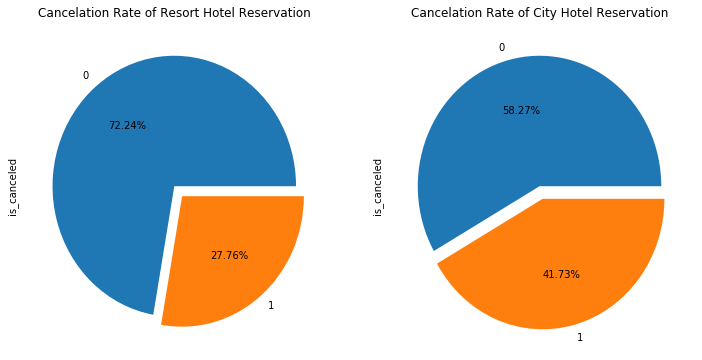

In [43]:
# 호텔 종류와 취소율 사이의 상관관계 

f, ax = plt.subplots(1,2,figsize=(12,6))
# plt.subplot(121)
# plt.title('Cancelation Rate of Resort Hotel Reservation')
df[df['hotel']=='Resort Hotel']['is_canceled'].value_counts().plot.pie(explode=[0,0.1],autopct="%.2f%%",ax=ax[0], title='Cancelation Rate of Resort Hotel Reservation')

# plt.subplot(122)
# plt.title('Cancelation Rate of City Hotel Reservation')
df[df['hotel']=='City Hotel']['is_canceled'].value_counts().plot.pie(explode=[0,0.1],autopct="%.2f%%",ax=ax[1], title='Cancelation Rate of City Hotel Reservation')
plt.show()

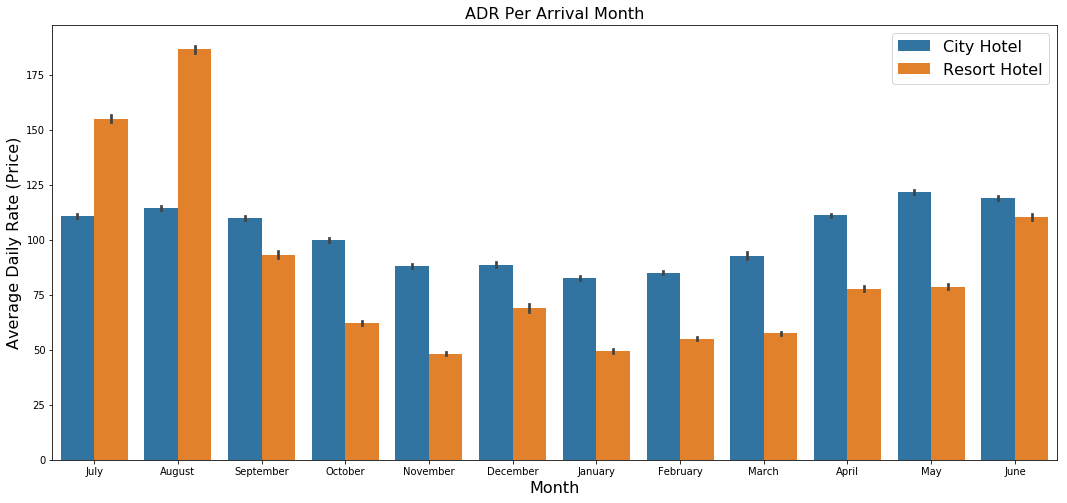

In [20]:
#가격과 Month의 관계 
plt.figure(figsize=(18, 8))
sns.barplot(x = "arrival_date_month", y = "adr", hue="hotel", data=df,
            hue_order = ["City Hotel", "Resort Hotel"])
plt.title("ADR Per Arrival Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Average Daily Rate (Price)", fontsize=16)
plt.legend(loc="upper right", fontsize=16)
plt.show()

In [21]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

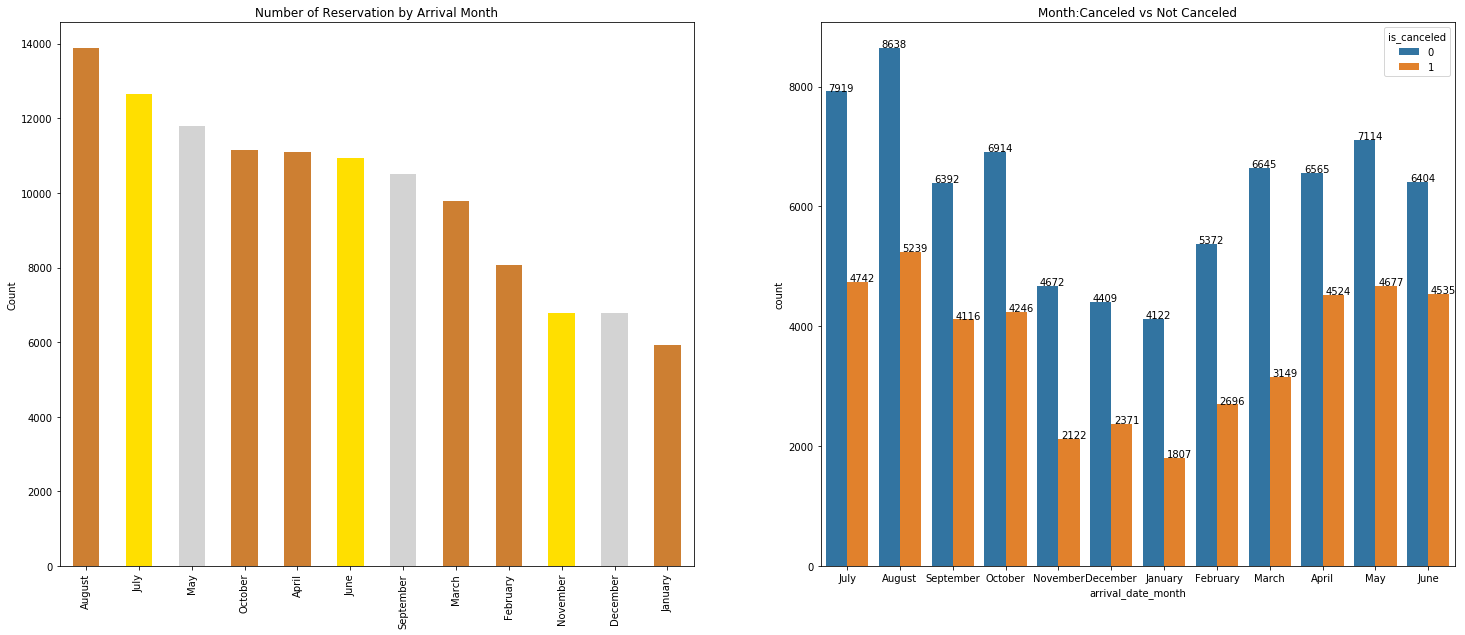

In [41]:
f, ax = plt.subplots(1,2,figsize=(25,10))
df['arrival_date_month'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Reservation by Arrival Month')
ax[0].set_ylabel('Count')
sns.countplot('arrival_date_month', hue='is_canceled', data=df,ax=ax[1])
ax[1].set_title('Month:Canceled vs Not Canceled')
for p in ax[1].patches:
    ax[1].annotate( f'{p.get_height():d}', ( p.get_x()+0.05, p.get_height()+10 ) )
plt.show()

C:\Users\User\anaconda3\envs\tf2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


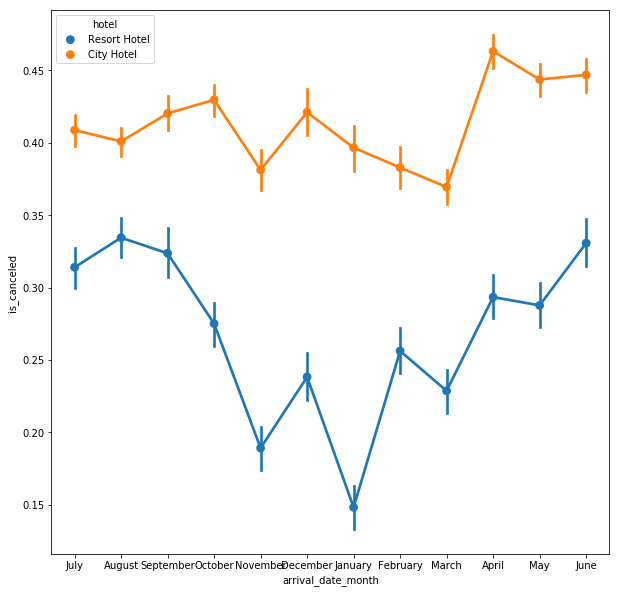

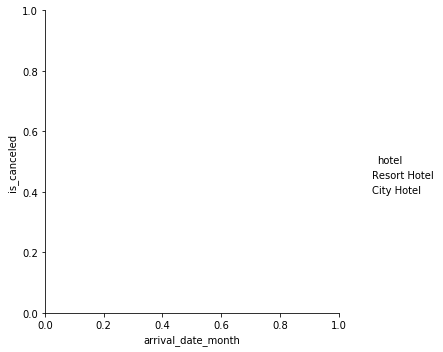

In [39]:

fig, ax = plt.subplots(figsize=(10,10))
sns.factorplot( 'arrival_date_month','is_canceled', hue='hotel', data=df, ax=ax,kind='point')

In [36]:
# adr_cancel_data["mean"]

In [32]:
# adr_cancel_data["mean"].values.astype(np.int32) * 100

In [33]:
# adr_cancel_data

In [27]:
# # group data for adr:
# # adr_cancel_data = df.groupby("adr")["is_canceled"].describe()
# # adr_cancel_data.head()
# #show figure:
# plt.figure(figsize=(12, 8))
# sns.regplot(x=, y=(adr_cancel_data["mean"].values.astype(np.int32) * 100))
# plt.title("Effect of ADR on cancelation", fontsize=16)
# plt.xlabel("ADR", fontsize=16)
# plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,400)
# plt.ylim(0,100)
# plt.show()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

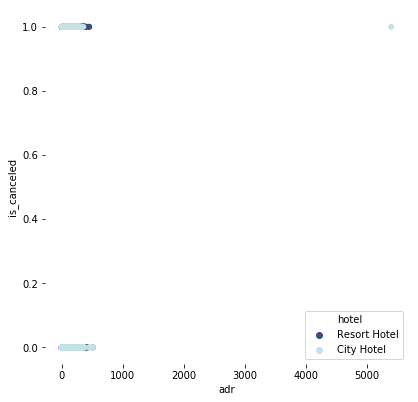

In [28]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
# clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="adr", y="is_canceled",
                hue="hotel",
                palette="ch:r=-.2,d=.3_r",
                hue_order=["Resort Hotel", "City Hotel"],
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

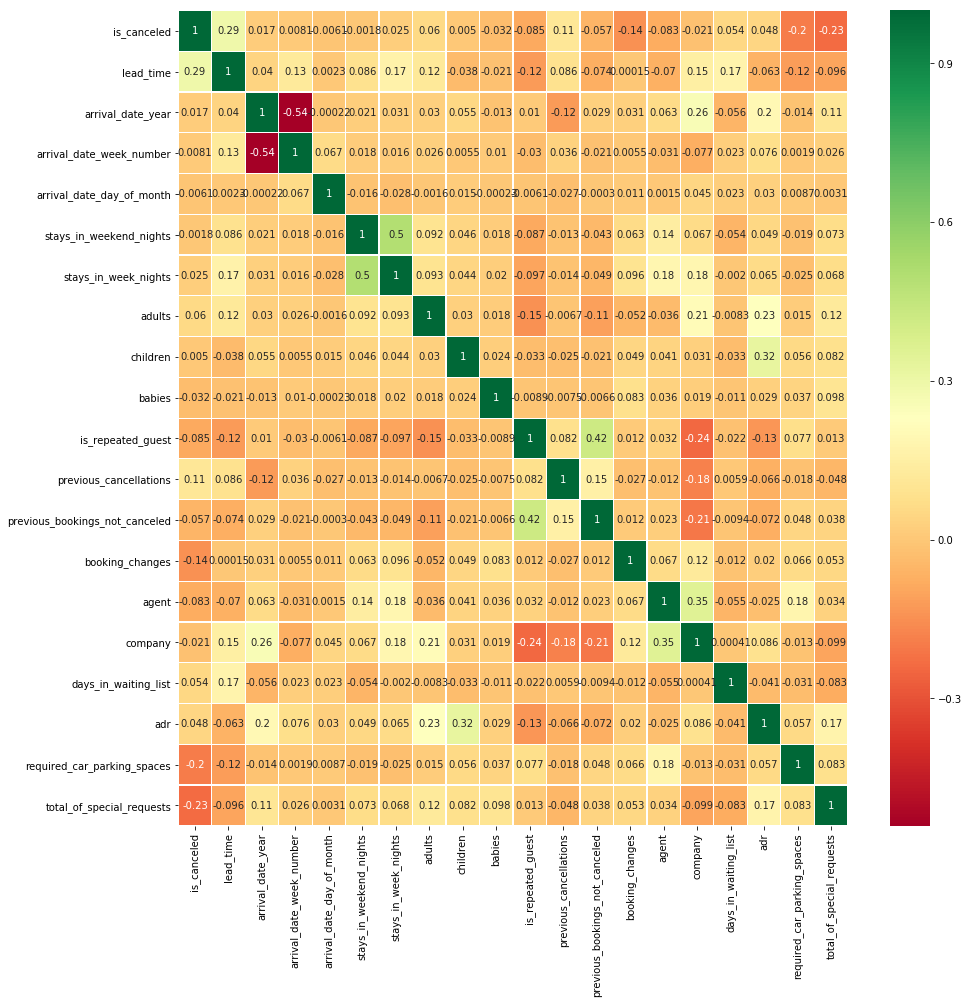

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()